In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('data.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [5]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [30]:
X = df.iloc[:,2:8]  # all rows, all the features and no labels
print(X)
y = df.iloc[:, 0]  # all rows, label only

       timestamp  day_of_week  is_weekend  is_holiday  temperature  \
0          61211            4           0           0        71.76   
1          62414            4           0           0        71.76   
2          63015            4           0           0        71.76   
3          63616            4           0           0        71.76   
4          64217            4           0           0        71.76   
...          ...          ...         ...         ...          ...   
62179      67348            5           1           0        61.07   
62180      67955            5           1           0        61.07   
62181      68560            5           1           0        56.71   
62182      69167            5           1           0        56.71   
62183      69771            5           1           0        56.71   

       is_start_of_semester  
0                         0  
1                         0  
2                         0  
3                         0  
4        

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.68623792,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.71106127,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.96515979,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.99010704,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497,
         0.83101258],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183,
         0.83090197],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247,
         0.8308467 ],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787,
        -0.41471388],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368,
        -0.41476969],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627,
        -0.41482523]])

In [33]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [34]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ,
       0.03454679])

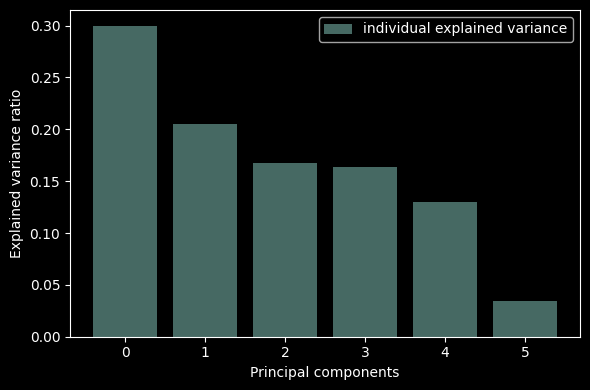

In [35]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [36]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627]])

In [37]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ])

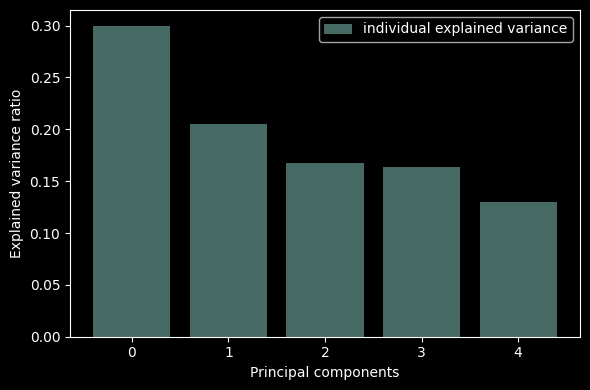

In [38]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 6)

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [42]:
Rest of the model